In [11]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## HR Analysis

In [2]:
# Cargar el dataset
file_path = "/home/gmartinez/Tesis/Datasets/Synthetic data/outputs/hr_series.csv"
hr_data = pd.read_csv(file_path)
hr_data

,user_id,timestamp,hr,state
0,1,2024-01-12 05:55:05.986087812,75.0,heart_rate_rest
1,1,2024-01-12 05:56:05.986087812,85.0,heart_rate_light_activity
2,1,2024-01-12 05:56:05.986087812,97.0,heart_rate_moderate_activity
3,1,2024-01-12 05:57:05.986087812,82.0,heart_rate_light_activity
4,1,2024-01-12 06:01:05.986087812,64.0,heart_rate_rest
...,...,...,...,...
5352600,300,2024-12-29 12:54:36.230180508,63.0,heart_rate_rest
5352601,300,2024-12-29 12:55:36.230180508,59.0,heart_rate_rest
5352602,300,2024-12-29 13:09:36.230180508,65.0,heart_rate_rest
5352603,300,2024-12-29 13:12:36.230180508,85.0,heart_rate_light_activity


In [12]:
# Asegurarse de que la columna timestamp sea de tipo datetime
hr_data['timestamp'] = pd.to_datetime(hr_data['timestamp'])

# Contar el número de usuarios únicos
num_users = hr_data['user_id'].nunique()
print(f"Número de usuarios únicos: {num_users}")

# Agrupar los datos por usuario y luego por día
hr_data['date'] = hr_data['timestamp'].dt.date
grouped = hr_data.groupby(['user_id', 'date']).size()

# Mostrar los registros de heart_rate por día, por usuario
grouped

Número de usuarios únicos: 300


user_id  date      
1        2024-01-12     68
         2024-01-13     80
         2024-01-16    148
         2024-01-18     63
         2024-01-20    106
                      ... 
300      2024-12-23    115
         2024-12-24     98
         2024-12-26     46
         2024-12-28     66
         2024-12-29     40
Length: 59671, dtype: int64

In [4]:
# Seleccionar un usuario aleatorio entre 1 y el número total de usuarios
random_user_id = random.randint(1, num_users)

# Filtrar los datos para el usuario seleccionado
user_data = hr_data[hr_data['user_id'] == random_user_id]

# Agrupar los datos del usuario por día
user_grouped_by_day = user_data.groupby('date').size()

print(f"Datos del usuario {random_user_id} agrupados por día:")
user_grouped_by_day

Datos del usuario 165 agrupados por día:


date
2024-01-01     67
2024-01-02    109
2024-01-03     71
2024-01-04    119
2024-01-05     58
             ... 
2024-12-25     97
2024-12-27     88
2024-12-28     68
2024-12-29     61
2024-12-30     40
Length: 309, dtype: int64

In [17]:
# Filtrar solo ese usuario
user_data = hr_data[hr_data['user_id'] == random_user_id]

# Obtener el primer día disponible
first_day = user_data['timestamp'].dt.date.min()


print(f"Datos del usuario {random_user_id}")
print("Primer día disponible:", first_day)
print("Total de registros:", len(day_data))
day_data.head(20)

Datos del usuario 165
Primer día disponible: 2024-01-01
Total de registros: 14347


,user_id,timestamp,hr,state,date
15046,2,2024-01-02 11:43:08.202688858,56.0,heart_rate_rest,2024-01-02
15047,2,2024-01-02 11:44:08.202688858,56.0,heart_rate_rest,2024-01-02
15048,2,2024-01-02 11:44:08.202688858,55.0,heart_rate_rest,2024-01-02
15049,2,2024-01-02 11:45:08.202688858,66.0,heart_rate_rest,2024-01-02
15050,2,2024-01-02 11:45:08.202688858,64.0,heart_rate_light_activity,2024-01-02
15051,2,2024-01-02 11:46:08.202688858,82.0,heart_rate_light_activity,2024-01-02
15052,2,2024-01-02 11:48:08.202688858,90.0,heart_rate_light_activity,2024-01-02
15053,2,2024-01-02 11:52:08.202688858,91.0,heart_rate_light_activity,2024-01-02
15054,2,2024-01-02 11:53:08.202688858,79.0,heart_rate_light_activity,2024-01-02
15055,2,2024-01-02 11:53:08.202688858,88.0,heart_rate_moderate_activity,2024-01-02


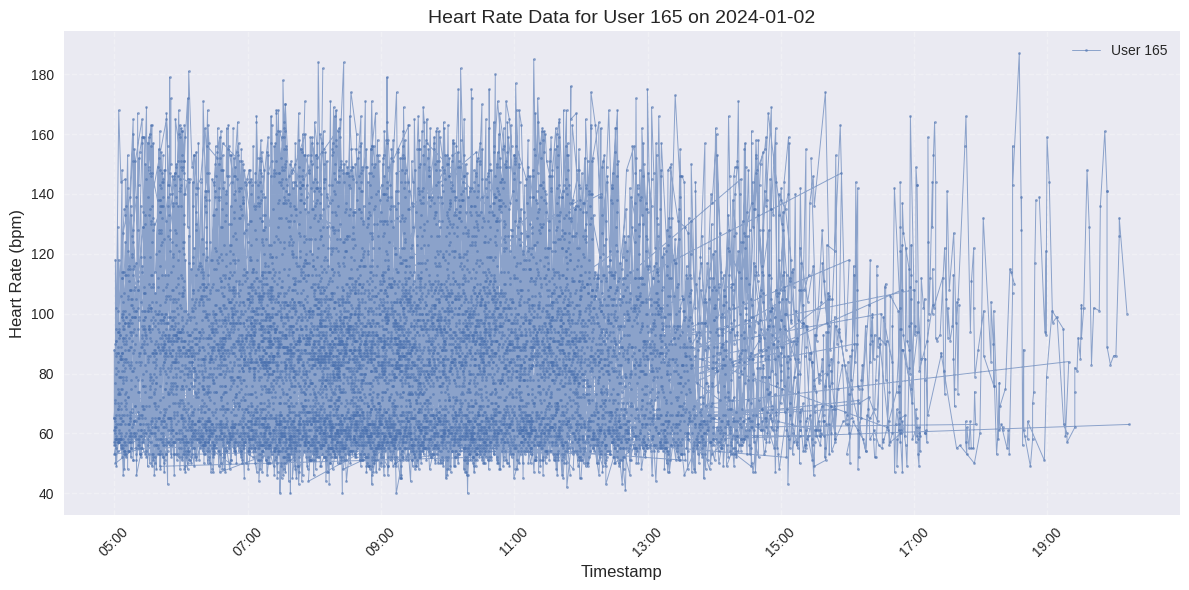

In [16]:
# Graficar los puntos
plt.style.use('seaborn-v0_8')

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(
    day_data['timestamp'],
    day_data['hr'],
    marker='.',
    markersize=4,
    linestyle='-',
    linewidth=0.7,
    alpha=0.6,
    label=f'User {random_user_id}'
)

# Etiquetas y título
ax.set_xlabel('Timestamp', fontsize=12)
ax.set_ylabel('Heart Rate (bpm)', fontsize=12)
ax.set_title(f'Heart Rate Data for User {random_user_id} on {day}', fontsize=14)

# Formato del eje X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # cada 2 horas

plt.xticks(rotation=45)

# Mejor visibilidad
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

## Sleep Analysis

In [7]:
# Cargar el nuevo dataset
sleep_file_path = "/home/gmartinez/Tesis/Datasets/Synthetic data/outputs/sleep_series.csv"
sleep_data = pd.read_csv(sleep_file_path)

# Asegurarse de que la columna timestamp sea de tipo datetime
sleep_data['night_date'] = pd.to_datetime(sleep_data['night_date'])

# Filtrar los datos para el usuario seleccionado
user_sleep_data = sleep_data[sleep_data['user_id'] == random_user_id]

print(f"Datos de sueño del usuario {random_user_id}:")
user_sleep_data

Datos de sueño del usuario 165:


,user_id,night_date,total_hours,deep_minutes,rem_minutes,awake_minutes,sleep_latency_minutes,awakenings,failure_minutes
15307,165,2024-01-25,7.300000,124,11,131,1,62,81
15308,165,2024-02-04,6.850000,114,19,114,1,48,77
15309,165,2024-02-12,7.500000,108,15,141,1,66,114
15310,165,2024-02-17,6.766667,136,23,94,3,43,49
15311,165,2024-02-24,4.700000,67,14,91,4,34,82
15312,165,2024-02-26,8.066667,151,17,123,2,53,91
15313,165,2024-03-01,6.083333,122,5,88,3,40,100
15314,165,2024-03-09,7.250000,139,19,88,2,40,56
15315,165,2024-03-18,5.966667,82,14,104,1,52,66
15316,165,2024-03-26,5.600000,123,10,74,2,40,92


In [9]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5352605 entries, 0 to 5352604
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   user_id    int64         
 1   timestamp  datetime64[ns]
 2   hr         float64       
 3   state      object        
 4   date       object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 204.2+ MB


In [10]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28741 entries, 0 to 28740
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                28741 non-null  int64         
 1   night_date             28741 non-null  datetime64[ns]
 2   total_hours            28741 non-null  float64       
 3   deep_minutes           28741 non-null  int64         
 4   rem_minutes            28741 non-null  int64         
 5   awake_minutes          28741 non-null  int64         
 6   sleep_latency_minutes  28741 non-null  int64         
 7   awakenings             28741 non-null  int64         
 8   failure_minutes        28741 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 2.0 MB
